In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# # Load the dataset
# df_ra = pd.read_csv('Rate.csv', low_memory=False)

In [3]:
# display all columns, Non-Null Count and Dtype
# df_ra.info()

In [4]:
# df_ra.shape

In [5]:
# # Counts BusinessYear
# df_ra['BusinessYear'].value_counts().reset_index()

In [6]:
# # Load the dataset
# df_ra = pd.read_csv('Rate.csv', low_memory=False)

In [7]:
# # Keep BusinessYear 2014 in df_ra2014
# df_ra2014 = df_ra[df_ra['BusinessYear'] == 2014]

In [8]:
# df_ra2014.shape

In [9]:
# Load the dataset
df_ra2014 = pd.read_csv('Rate_2014.csv', low_memory=False)

In [10]:
# df_ra2014.to_csv("Rate_2014.csv", index=False)

In [11]:
# 3,796,388 records
df_ra2014['BusinessYear'].value_counts().reset_index()

,BusinessYear,count
0,2014,3796388


In [12]:
df_ra2014.head(5)

,BusinessYear,StateCode,IssuerId,SourceName,VersionNum,ImportDate,IssuerId2,FederalTIN,RateEffectiveDate,RateExpirationDate,...,IndividualRate,IndividualTobaccoRate,Couple,PrimarySubscriberAndOneDependent,PrimarySubscriberAndTwoDependents,PrimarySubscriberAndThreeOrMoreDependents,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents,RowNumber
0,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,...,29.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14
1,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,...,36.95,NaN,73.9,107.61,107.61,107.61,144.56,144.56,144.56,14
2,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,...,36.95,NaN,73.9,107.61,107.61,107.61,144.56,144.56,144.56,15
3,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,...,32.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15
4,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,...,32.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16


In [13]:
# Counts values and reset index
df_ra2014['Age'].value_counts().reset_index

<bound method Series.reset_index of Age
0-20             82727
54               82321
45               82321
46               82321
47               82321
48               82321
49               82321
50               82321
51               82321
52               82321
53               82321
55               82321
43               82321
56               82321
57               82321
58               82321
59               82321
60               82321
61               82321
62               82321
63               82321
64               82321
44               82321
42               82321
31               82321
30               82321
21               82321
22               82321
23               82321
24               82321
25               82321
26               82321
27               82321
28               82321
29               82321
65 and over      82321
41               82321
32               82321
33               82321
34               82321
35               82321
36               

In [14]:
# Remove Family Option	9216 records from 3796388 = 3787172 
# Step1 : Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Step2 : Remove rows where 'Age' column has the value 'Family Option'
df_ra_clean = df_ra2014[df_ra2014['Age'] != 'Family Option'].copy()
# Step3 : Replace Age 0-20 to 20 and 65 and over to 65
df_ra_clean['Age'] = df_ra_clean['Age'].str.replace('0-20', '20')
df_ra_clean['Age'] = df_ra_clean['Age'].str.replace('65 and over', '65')
# Step4 : convert columns to numerical types
df_ra_clean['Age'] = pd.to_numeric(df_ra_clean['Age'], errors='coerce')

# Step5 : Select only the 'Age' and 'PlanId' columns from the cleaned DataFrame
df_ra_clean = df_ra_clean[['Age', 'PlanId']]
df_ra_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3787172 entries, 0 to 3796387
Data columns (total 2 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Age     int64 
 1   PlanId  object
dtypes: int64(1), object(1)
memory usage: 86.7+ MB


In [15]:
# Common age bins for health-related analysis include the following categories 
# by Fixed Interval Binning, a simple approach to create age bins 
# and to analyze how different age groups and plan types together affect the dependent variable

bins = [0,21, 26, 41, 61, 65, float('inf')]  # Define age ranges
labels = ['0-20', '21-25', '26-40', '41-60', '61-64', '65+']  # Corresponding labels

# Create a new column for age bins
df_ra_clean['AgeGroup'] = pd.cut(df_ra_clean['Age'], bins=bins, labels=labels, right=False)
df_ra_clean = df_ra_clean[['AgeGroup', 'Age', 'PlanId']].reset_index(drop=True).sort_values(by='AgeGroup')


In [16]:
df_ra_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3787172 entries, 0 to 3787171
Data columns (total 3 columns):
 #   Column    Dtype   
---  ------    -----   
 0   AgeGroup  category
 1   Age       int64   
 2   PlanId    object  
dtypes: category(1), int64(1), object(1)
memory usage: 90.3+ MB


In [17]:
df_ra_clean['AgeGroup'].value_counts().reset_index()

,AgeGroup,count
0,41-60,1646420
1,26-40,1234815
2,21-25,411605
3,61-64,329284
4,0-20,82727
5,65+,82321


In [18]:
df_ra_clean.shape

(3787172, 3)

In [19]:
df_ra_clean.head()

,AgeGroup,Age,PlanId
0,0-20,20,21989AK0010001
2319186,0-20,20,87226TX0030004
2319232,0-20,20,87226TX0030005
2319278,0-20,20,87226TX0030007
2319324,0-20,20,87226TX0030008


In [20]:
grouped_counts = df_ra_clean.groupby(['AgeGroup', 'PlanId'], observed=True).size().reset_index(name='Count')
grouped_counts

,AgeGroup,PlanId,Count
0,0-20,10191NJ0030001,1
1,0-20,10191NJ0030002,1
2,0-20,10191NJ0040001,1
3,0-20,10191NJ0040002,1
4,0-20,10191NJ0050001,1
...,...,...,...
36803,65+,99969OH0040012,17
36804,65+,99969OH0040013,17
36805,65+,99969OH0050007,68
36806,65+,99969OH0050013,68


In [21]:
grouped_counts.shape

(36808, 3)

In [22]:
# Check which rows have at least one null value
rows_with_nulls = grouped_counts[grouped_counts.isnull().any(axis=1)]
print("\nRows with at least one null value:\n", rows_with_nulls)


Rows with at least one null value:
 Empty DataFrame
Columns: [AgeGroup, PlanId, Count]
Index: []


In [23]:
# Check which rows have all null values
rows_all_nulls = grouped_counts[grouped_counts.isnull().all(axis=1)]
print("\nRows with all null values:\n", rows_all_nulls)  # Likely empty


Rows with all null values:
 Empty DataFrame
Columns: [AgeGroup, PlanId, Count]
Index: []


In [24]:
# Get the indices of rows with any null values
null_row_indices = grouped_counts.index[grouped_counts.isnull().any(axis=1)].tolist()
print("\nIndices of rows with any nulls:", null_row_indices)


Indices of rows with any nulls: []


In [25]:
grouped_counts.head()

,AgeGroup,PlanId,Count
0,0-20,10191NJ0030001,1
1,0-20,10191NJ0030002,1
2,0-20,10191NJ0040001,1
3,0-20,10191NJ0040002,1
4,0-20,10191NJ0050001,1


In [26]:
grouped_counts.shape


(36808, 3)

In [27]:
unique_values = grouped_counts['Count'].unique()
unique_values

array([   1,   24,    7,    4,   64,   16,    3,    6,   40,   10,   13,
         26,   12,   32,    8,    9,   67,   36,  268,   28,   17,   68,
          5,    2,   52,   11,   48,   19,  184,   46,  134,  176,   44,
         22,  104,   20,   23,   72,   18,   15,   27,  120,   35,  320,
         80,   30,  200,   50,   65,  130,   60,  160,   45,  335,  180,
       1340,  140,   85,  340,   25,  260,   55,  240,   95,  920,  230,
        670,  880,  220,  110,  520,  100,  115,  360,   90,   75,  135,
        105,  960,  600,  150,  195,  390,  480, 1005,  540, 4020,  420,
        255, 1020,  780,  165,  720,  285, 2760,  690, 2010, 2640,  660,
        330, 1560,  300,  345, 1080,  270,  225,  405, 1280,  800,  640,
       5360,  560, 1360, 1040,  380, 3680, 2680, 3520,  440, 2080,  400,
        460, 1440,   96,  256,  128,  144, 1072,  112,  272,  208,  192,
         76,  736,  536,  704,   88,  416,   92,  288,  108], dtype=int64)

In [28]:
# Get unique values for all columns
for col in grouped_counts.columns:
    unique_values = grouped_counts[col].unique()
    print(f"Unique values in '{col}': {unique_values}")

Unique values in 'AgeGroup': ['0-20', '21-25', '26-40', '41-60', '61-64', '65+']
Categories (6, object): ['0-20' < '21-25' < '26-40' < '41-60' < '61-64' < '65+']
Unique values in 'PlanId': ['10191NJ0030001' '10191NJ0030002' '10191NJ0040001' ... '99969OH0050007'
 '99969OH0050013' '99969OH0070001']
Unique values in 'Count': [   1   24    7    4   64   16    3    6   40   10   13   26   12   32
    8    9   67   36  268   28   17   68    5    2   52   11   48   19
  184   46  134  176   44   22  104   20   23   72   18   15   27  120
   35  320   80   30  200   50   65  130   60  160   45  335  180 1340
  140   85  340   25  260   55  240   95  920  230  670  880  220  110
  520  100  115  360   90   75  135  105  960  600  150  195  390  480
 1005  540 4020  420  255 1020  780  165  720  285 2760  690 2010 2640
  660  330 1560  300  345 1080  270  225  405 1280  800  640 5360  560
 1360 1040  380 3680 2680 3520  440 2080  400  460 1440   96  256  128
  144 1072  112  272  208  192   76  

In [29]:
grouped_counts.to_csv("grouped_counts_1.csv", index=False)

In [30]:
import pandas as pd

# Read the data
grouped_counts = pd.read_csv('grouped_counts_1.csv')

# Unique values in each column
for col in grouped_counts.columns:
    print(f"Unique values in '{col}': {grouped_counts[col].unique()}")

# Counts of each AgeGroup
print("\nCounts of each AgeGroup:")
print(grouped_counts['AgeGroup'].value_counts())

# Counts of each PlanId
print("\nCounts of each PlanId:")
print(grouped_counts['PlanId'].value_counts())

Unique values in 'AgeGroup': ['0-20' '21-25' '26-40' '41-60' '61-64' '65+']
Unique values in 'PlanId': ['10191NJ0030001' '10191NJ0030002' '10191NJ0040001' ... '99969OH0050007'
 '99969OH0050013' '99969OH0070001']
Unique values in 'Count': [   1   24    7    4   64   16    3    6   40   10   13   26   12   32
    8    9   67   36  268   28   17   68    5    2   52   11   48   19
  184   46  134  176   44   22  104   20   23   72   18   15   27  120
   35  320   80   30  200   50   65  130   60  160   45  335  180 1340
  140   85  340   25  260   55  240   95  920  230  670  880  220  110
  520  100  115  360   90   75  135  105  960  600  150  195  390  480
 1005  540 4020  420  255 1020  780  165  720  285 2760  690 2010 2640
  660  330 1560  300  345 1080  270  225  405 1280  800  640 5360  560
 1360 1040  380 3680 2680 3520  440 2080  400  460 1440   96  256  128
  144 1072  112  272  208  192   76  736  536  704   88  416   92  288
  108]

Counts of each AgeGroup:
AgeGroup
0-20     6

In [31]:
import pandas as pd

# Read the data
grouped_counts = pd.read_csv('grouped_counts_1.csv')
grouped_counts.head()

,AgeGroup,PlanId,Count
0,0-20,10191NJ0030001,1
1,0-20,10191NJ0030002,1
2,0-20,10191NJ0040001,1
3,0-20,10191NJ0040002,1
4,0-20,10191NJ0050001,1


In [32]:
import pandas as pd

# Read the data
grouped_counts = pd.read_csv('grouped_counts_1.csv')

# Remove rows with duplicate values in all 3 columns
grouped_counts_no_duplicates = grouped_counts.drop_duplicates(
    subset=['AgeGroup', 'PlanId', 'Count']
)

# Save cleaned data
grouped_counts_no_duplicates.to_csv('grouped_counts_cleaned.csv', index=False)

In [33]:
import pandas as pd

# Read the data
grouped_counts = pd.read_csv('grouped_counts_1.csv')

# Remove rows with duplicate values in all 3 columns
grouped_counts_no_duplicates = grouped_counts.drop_duplicates(
    subset=['AgeGroup', 'PlanId', 'Count']
)


# Create a new column 'ShortPlanId' by removing the last five digits of 'PlanId'
grouped_counts['ShortPlanId'] = grouped_counts['PlanId'].str[:-5]

# Count occurrences of each 'ShortPlanId'
plan_id_counts = grouped_counts['ShortPlanId'].value_counts()

# Display the results
print(plan_id_counts)


ShortPlanId
50816IN01    852
52664OH14    576
28162OH00    516
86217MI00    486
92036OH00    432
            ... 
90955DE01      6
87701NH00      6
40411NC00      6
32561PA00      6
30042OH00      2
Name: count, Length: 595, dtype: int64


In [34]:
grouped_counts_1 = grouped_counts.drop('PlanId', axis=1)
grouped_counts_1

,AgeGroup,Count,ShortPlanId
0,0-20,1,10191NJ00
1,0-20,1,10191NJ00
2,0-20,1,10191NJ00
3,0-20,1,10191NJ00
4,0-20,1,10191NJ00
...,...,...,...
36803,65+,17,99969OH00
36804,65+,17,99969OH00
36805,65+,68,99969OH00
36806,65+,68,99969OH00


In [35]:
grouped_counts_1.to_csv("grp_count.csv",index = False)

In [36]:
df_sr = pd.read_csv('grp_count.csv', low_memory=False)

In [37]:
df_pa = pd.read_csv('PlanAttributes.csv',low_memory=False)

In [38]:
# inspect the dataset
df_sr.shape

(36808, 3)

In [39]:
# display all columns
pd.set_option('display.max_columns',None)

# display first 5 rows
df_sr.head()

,AgeGroup,Count,ShortPlanId
0,0-20,1,10191NJ00
1,0-20,1,10191NJ00
2,0-20,1,10191NJ00
3,0-20,1,10191NJ00
4,0-20,1,10191NJ00


In [40]:
# display last 5 rows
df_sr.tail()

,AgeGroup,Count,ShortPlanId
36803,65+,17,99969OH00
36804,65+,17,99969OH00
36805,65+,68,99969OH00
36806,65+,68,99969OH00
36807,65+,17,99969OH00


In [41]:
# print first 5 row all columns
print(df_sr.head())

  AgeGroup  Count ShortPlanId
0     0-20      1   10191NJ00
1     0-20      1   10191NJ00
2     0-20      1   10191NJ00
3     0-20      1   10191NJ00
4     0-20      1   10191NJ00


In [42]:
# display all columns, Non-Null Count and Dtype
df_sr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36808 entries, 0 to 36807
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   AgeGroup     36808 non-null  object
 1   Count        36808 non-null  int64 
 2   ShortPlanId  36808 non-null  object
dtypes: int64(1), object(2)
memory usage: 862.8+ KB


In [43]:
# Countns BusinessYear
df_pa['BusinessYear'].value_counts().reset_index()

,BusinessYear,count
0,2015,31253
1,2016,27381
2,2014,18719


In [44]:
# Keep BusinessYear 2014 in df_pa2014
df_pa2014 = df_pa[df_pa['BusinessYear'] == 2014]

In [45]:
df_pa2014.to_csv("PlanAttributes2014.csv",index=False)

In [46]:
df_pa2014['BusinessYear'].value_counts().reset_index()
# Counts values and reset index "PlanType"
df_pa2014['PlanType'].value_counts().reset_index

<bound method Series.reset_index of PlanType
PPO          8515
HMO          6957
POS          2043
EPO          1078
Indemnity     126
Name: count, dtype: int64>

In [47]:
# Counts values and reset index "MetalLevel"
df_pa2014['MetalLevel'].value_counts().reset_index

<bound method Series.reset_index of MetalLevel
Silver          7000
Gold            3509
Bronze          3394
Low             1903
High            1629
Platinum         908
Catastrophic     376
Name: count, dtype: int64>

In [48]:
#Select only the columns you want to variable df_plantype_metal
df_plantype_metal = df_pa2014[['StandardComponentId','PlanType','MetalLevel']]

In [49]:
# display first 5 rows
df_plantype_metal.head()

,StandardComponentId,PlanType,MetalLevel
0,21989AK0020002,PPO,Low
1,21989AK0020002,PPO,Low
2,21989AK0020001,PPO,High
3,21989AK0010001,PPO,Low
4,21989AK0010001,PPO,Low


In [50]:
# Remove duplicate rows from a DataFrame, considering only the StandardComponentId column
df_duplicate = df_plantype_metal.drop_duplicates(subset=["StandardComponentId"], keep="first")
df_results = df_duplicate[['StandardComponentId','PlanType','MetalLevel']].reset_index()
df_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6632 entries, 0 to 6631
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   index                6632 non-null   int64 
 1   StandardComponentId  6632 non-null   object
 2   PlanType             6632 non-null   object
 3   MetalLevel           6632 non-null   object
dtypes: int64(1), object(3)
memory usage: 207.4+ KB


In [51]:
# Create a new column with the first part of the StandardComponentId
df_results['New_StandardComponentId'] = df_results['StandardComponentId'].str[:-5] 

In [52]:
df_results = df_results.drop(columns=["StandardComponentId"])

In [53]:
df_results

,index,PlanType,MetalLevel,New_StandardComponentId
0,0,PPO,Low,21989AK00
1,2,PPO,High,21989AK00
2,3,PPO,Low,21989AK00
3,6,PPO,Bronze,73836AK06
4,7,PPO,Gold,73836AK06
...,...,...,...,...
6627,18708,PPO,Low,53843WV00
6628,18709,PPO,Low,53843WV00
6629,18712,PPO,High,53843WV00
6630,18713,PPO,High,53843WV00


In [54]:
df_sr

,AgeGroup,Count,ShortPlanId
0,0-20,1,10191NJ00
1,0-20,1,10191NJ00
2,0-20,1,10191NJ00
3,0-20,1,10191NJ00
4,0-20,1,10191NJ00
...,...,...,...
36803,65+,17,99969OH00
36804,65+,17,99969OH00
36805,65+,68,99969OH00
36806,65+,68,99969OH00


In [55]:
# Merge file sample_rate.csv and PlanAttributes.csv
merged_df = pd.merge(df_sr, df_results, left_on='ShortPlanId', right_on='New_StandardComponentId', how='left')

In [56]:
# Display all columns, Non-Null Count and Dtype
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 996260 entries, 0 to 996259
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   AgeGroup                 996260 non-null  object 
 1   Count                    996260 non-null  int64  
 2   ShortPlanId              996260 non-null  object 
 3   index                    996254 non-null  float64
 4   PlanType                 996254 non-null  object 
 5   MetalLevel               996254 non-null  object 
 6   New_StandardComponentId  996254 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 53.2+ MB


In [57]:
import pandas as pd

# ... (Your code to create and manipulate the DataFrame) ...

# Set display options using the pandas library function
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None) # Show all columns

print(merged_df.head(50))  # Display the first 80 rows (or all if less than 80)

   AgeGroup  Count ShortPlanId   index PlanType MetalLevel  \
0      0-20      1   10191NJ00  5798.0      EPO   Platinum   
1      0-20      1   10191NJ00  5806.0      EPO     Bronze   
2      0-20      1   10191NJ00  5955.0      EPO     Silver   
3      0-20      1   10191NJ00  5960.0      EPO     Silver   
4      0-20      1   10191NJ00  5989.0      EPO     Silver   
5      0-20      1   10191NJ00  5990.0      EPO       Gold   
6      0-20      1   10191NJ00  5994.0      EPO     Silver   
7      0-20      1   10191NJ00  6012.0      EPO       Gold   
8      0-20      1   10191NJ00  6025.0      EPO       Gold   
9      0-20      1   10191NJ00  6045.0      EPO     Bronze   
10     0-20      1   10191NJ00  6050.0      EPO     Silver   
11     0-20      1   10191NJ00  6057.0      EPO     Bronze   
12     0-20      1   10191NJ00  6076.0      EPO   Platinum   
13     0-20      1   10191NJ00  5798.0      EPO   Platinum   
14     0-20      1   10191NJ00  5806.0      EPO     Bronze   
15     0

In [58]:
merged_df.shape

(996260, 7)

In [59]:
import pandas as pd

# Drop duplicate rows based on all columns
df_no_duplicates = merged_df.drop_duplicates()

# Print the shapes of the original and deduplicated DataFrames
print("Original DataFrame shape:", merged_df.shape)
print("DataFrame after dropping duplicates:", df_no_duplicates.shape)

Original DataFrame shape: (996260, 7)
DataFrame after dropping duplicates: (65636, 7)


In [60]:
df_no_duplicates.head()

,AgeGroup,Count,ShortPlanId,index,PlanType,MetalLevel,New_StandardComponentId
0,0-20,1,10191NJ00,5798.0,EPO,Platinum,10191NJ00
1,0-20,1,10191NJ00,5806.0,EPO,Bronze,10191NJ00
2,0-20,1,10191NJ00,5955.0,EPO,Silver,10191NJ00
3,0-20,1,10191NJ00,5960.0,EPO,Silver,10191NJ00
4,0-20,1,10191NJ00,5989.0,EPO,Silver,10191NJ00


In [61]:
# Display all columns, Non-Null Count and Dtype
df_no_duplicates.info()

<class 'pandas.core.frame.DataFrame'>
Index: 65636 entries, 0 to 996227
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AgeGroup                 65636 non-null  object 
 1   Count                    65636 non-null  int64  
 2   ShortPlanId              65636 non-null  object 
 3   index                    65630 non-null  float64
 4   PlanType                 65630 non-null  object 
 5   MetalLevel               65630 non-null  object 
 6   New_StandardComponentId  65630 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 4.0+ MB


In [62]:
# Check for NaN values in each column
print(df_no_duplicates.isna().sum()) 

AgeGroup                   0
Count                      0
ShortPlanId                0
index                      6
PlanType                   6
MetalLevel                 6
New_StandardComponentId    6
dtype: int64


In [63]:
# Find rows with NaN values
rows_with_na = df_no_duplicates[df_no_duplicates.isna().any(axis=1)]

# Print the rows with NaN values
print("Rows with NaN values:")
print(rows_with_na) 

Rows with NaN values:
       AgeGroup  Count ShortPlanId  index PlanType MetalLevel  \
11787      0-20     26   19312TZ00    NaN      NaN        NaN   
177887    21-25    130   19312TZ00    NaN      NaN        NaN   
343919    26-40    390   19312TZ00    NaN      NaN        NaN   
509951    41-60    520   19312TZ00    NaN      NaN        NaN   
675983    61-64    104   19312TZ00    NaN      NaN        NaN   
842015      65+     26   19312TZ00    NaN      NaN        NaN   

       New_StandardComponentId  
11787                      NaN  
177887                     NaN  
343919                     NaN  
509951                     NaN  
675983                     NaN  
842015                     NaN  


In [64]:
# Drop rows with any NaN values
df_no_na = df_no_duplicates.dropna() 

In [65]:
df_no_na.shape

(65630, 7)

In [66]:
df_no_na.head()

,AgeGroup,Count,ShortPlanId,index,PlanType,MetalLevel,New_StandardComponentId
0,0-20,1,10191NJ00,5798.0,EPO,Platinum,10191NJ00
1,0-20,1,10191NJ00,5806.0,EPO,Bronze,10191NJ00
2,0-20,1,10191NJ00,5955.0,EPO,Silver,10191NJ00
3,0-20,1,10191NJ00,5960.0,EPO,Silver,10191NJ00
4,0-20,1,10191NJ00,5989.0,EPO,Silver,10191NJ00


In [67]:
df_new = df_no_na.drop('New_StandardComponentId', axis=1) 

In [68]:
df_new.head(10)

,AgeGroup,Count,ShortPlanId,index,PlanType,MetalLevel
0,0-20,1,10191NJ00,5798.0,EPO,Platinum
1,0-20,1,10191NJ00,5806.0,EPO,Bronze
2,0-20,1,10191NJ00,5955.0,EPO,Silver
3,0-20,1,10191NJ00,5960.0,EPO,Silver
4,0-20,1,10191NJ00,5989.0,EPO,Silver
5,0-20,1,10191NJ00,5990.0,EPO,Gold
6,0-20,1,10191NJ00,5994.0,EPO,Silver
7,0-20,1,10191NJ00,6012.0,EPO,Gold
8,0-20,1,10191NJ00,6025.0,EPO,Gold
9,0-20,1,10191NJ00,6045.0,EPO,Bronze


In [69]:
df_new.to_csv("merged_plantype_updated.csv",index=1)

In [70]:
# Load the dataset
df_bcs2014 = pd.read_csv("df_bcs2014.csv",low_memory=False)

In [71]:
# # Keep BusinessYear 2014 in df_bcs2014
# df_bcs2014 = df_bcs[df_bcs['BusinessYear'] == 2014]

In [72]:
# df_bcs2014.to_csv("df_bcs2014.csv",index=False)

In [73]:
## display all columns
pd.set_option('display.max_columns',None)
# display first 5 rows
df_bcs2014.head()

,BenefitName,BusinessYear,CoinsInnTier1,CoinsInnTier2,CoinsOutofNet,CopayInnTier1,CopayInnTier2,CopayOutofNet,EHBVarReason,Exclusions,Explanation,ImportDate,IsCovered,IsEHB,IsExclFromInnMOOP,IsExclFromOonMOOP,IsStateMandate,IsSubjToDedTier1,IsSubjToDedTier2,IssuerId,IssuerId2,LimitQty,LimitUnit,MinimumStay,PlanId,QuantLimitOnSvc,RowNumber,SourceName,StandardComponentId,StateCode,StateCode2,VersionNum
0,Routine Dental Services (Adult),2014,20%,NaN,20%,No Charge,NaN,No Charge,Above EHB,NaN,Combined annual benefit maximum of $1000 per y...,2014-03-19 07:06:49,Covered,NaN,No,No,NaN,No,No,21989,21989,1000.0,Dollars per Year,NaN,21989AK0010001-00,Yes,68,HIOS,21989AK0010001,AK,AK,6
1,Dental Check-Up for Children,2014,20%,NaN,20%,No Charge,NaN,No Charge,Substantially Equal,NaN,See policy for additional limitations,2014-03-19 07:06:49,Covered,Yes,No,No,NaN,No,No,21989,21989,1.0,Visit(s) per 6 Months,NaN,21989AK0010001-00,Yes,104,HIOS,21989AK0010001,AK,AK,6
2,Basic Dental Care - Child,2014,40%,NaN,40%,No Charge,NaN,No Charge,Substantially Equal,NaN,See policy for additional limitations,2014-03-19 07:06:49,Covered,Yes,No,No,NaN,Yes,Yes,21989,21989,NaN,NaN,NaN,21989AK0010001-00,NaN,110,HIOS,21989AK0010001,AK,AK,6
3,Orthodontia - Child,2014,50%,NaN,50%,No Charge,NaN,No Charge,Additional EHB Benefit,NaN,"24 month waiting period, See policy for additi...",2014-03-19 07:06:49,Covered,NaN,No,No,NaN,Yes,Yes,21989,21989,NaN,NaN,NaN,21989AK0010001-00,NaN,111,HIOS,21989AK0010001,AK,AK,6
4,Major Dental Care - Child,2014,50%,NaN,50%,No Charge,NaN,No Charge,Substantially Equal,NaN,See policy for additional limitations,2014-03-19 07:06:49,Covered,Yes,No,No,NaN,Yes,Yes,21989,21989,NaN,NaN,NaN,21989AK0010001-00,NaN,112,HIOS,21989AK0010001,AK,AK,6


In [74]:
# inspect the dataset
df_bcs2014.shape

(1164869, 32)

In [75]:
# Select only the columns you want to variable df_c1
df_c1 = df_bcs2014[['StandardComponentId','BenefitName','CoinsInnTier1']]

In [76]:
df_c1.shape

(1164869, 3)

In [77]:
df_c1.head()

,StandardComponentId,BenefitName,CoinsInnTier1
0,21989AK0010001,Routine Dental Services (Adult),20%
1,21989AK0010001,Dental Check-Up for Children,20%
2,21989AK0010001,Basic Dental Care - Child,40%
3,21989AK0010001,Orthodontia - Child,50%
4,21989AK0010001,Major Dental Care - Child,50%


In [78]:
# display all columns, Non-Null Count and Dtype
df_c1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1164869 entries, 0 to 1164868
Data columns (total 3 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   StandardComponentId  1164869 non-null  object
 1   BenefitName          1164869 non-null  object
 2   CoinsInnTier1        898756 non-null   object
dtypes: object(3)
memory usage: 26.7+ MB


In [79]:
# display first 5 rows
df_c1.head()

## display all rows
pd.set_option('display.max_rows',None)
df_c1['CoinsInnTier1'].value_counts().reset_index()

,CoinsInnTier1,count
0,No Charge,193294
1,0%,168042
2,20% Coinsurance after deductible,165858
3,30% Coinsurance after deductible,73182
4,0% Coinsurance after deductible,60155
5,No Charge after deductible,55547
6,10% Coinsurance after deductible,41587
7,50% Coinsurance after deductible,39676
8,40% Coinsurance after deductible,25730
9,50%,10725


In [80]:
df_c1['CoinsInnTier1'].unique()

array(['20%', '40%', '50%', nan, '0%', '30%',
       '50% Coinsurance after deductible',
       '100% Coinsurance after deductible',
       '80% Coinsurance after deductible', 'No Charge',
       '20% Coinsurance after deductible',
       '40% Coinsurance after deductible',
       '30% Coinsurance after deductible',
       '60% Coinsurance after deductible', 'No Charge after deductible',
       '45% Coinsurance after deductible',
       '65% Coinsurance after deductible', '100%', '15%', '45%', '35%',
       '0% Coinsurance after deductible',
       '70% Coinsurance after deductible',
       '10% Coinsurance after deductible', '10%',
       '35% Coinsurance after deductible',
       '15% Coinsurance after deductible',
       '5% Coinsurance after deductible', '$0', '25%', '65%',
       '25% Coinsurance after deductible', '5%', '60%', '13%', '18%',
       '18% Coinsurance after deductible', '21%', '55%',
       '55% Coinsurance after deductible',
       '16% Coinsurance after deductible'

In [81]:
# Ensure df_c1 is a copy to avoid the warning
df_c1 = df_c1.copy()

# Extract 'Coin' values
df_c1['Coin'] = df_c1['CoinsInnTier1'].str.extract(r'([\d,]+)')[0].replace({',': ''}, regex=True)

# Extract 'Description' values
df_c1['Description'] = df_c1['CoinsInnTier1'].str.replace(r'[\d,]+', '', regex=True).str.strip()


In [82]:
# display first 5 rows
df_c1.head()

,StandardComponentId,BenefitName,CoinsInnTier1,Coin,Description
0,21989AK0010001,Routine Dental Services (Adult),20%,20,%
1,21989AK0010001,Dental Check-Up for Children,20%,20,%
2,21989AK0010001,Basic Dental Care - Child,40%,40,%
3,21989AK0010001,Orthodontia - Child,50%,50,%
4,21989AK0010001,Major Dental Care - Child,50%,50,%


In [83]:
df_c1['Coin'].unique()

array(['20', '40', '50', nan, '0', '30', '100', '80', '60', '45', '65',
       '15', '35', '70', '10', '5', '25', '13', '18', '21', '55', '16',
       '9', '3', '90', '12', '33', '85', '6', '8', '7', '23', '77', '75',
       '46', '58', '14', '19', '29', '49', '26', '39', '42', '2', '32',
       '95', '110', '41', '52', '4'], dtype=object)

In [84]:
# Used to retrieve all unique values from the Description column in df_c1.
df_c1['Description'].unique()

array(['%', nan, '% Coinsurance after deductible', 'No Charge',
       'No Charge after deductible', '$'], dtype=object)

In [85]:
# Step1: Replace 'No Charge', 'No Charge after deductible', '0%' in Description to Coinsurance is 0
df_c1.loc[df_c1['Description'].isin(['No Charge', 'No Charge after deductible', '$']), 'Coin'] = '0'

# Step2: Drop 'NaN' in Coinsurance columns
# df_c1 = df_c1[df_c1['Description'] != 'NaN'].reset_index(drop=True)
df_cleaned = df_c1.dropna()

In [86]:
# Used to convert data values in columns to numeric type.
df_cleaned.loc[:, 'Coin'] = pd.to_numeric(df_cleaned['Coin'], errors='coerce')

In [87]:
# Used to retrieve all unique values from the Coin column in df_c1
df_cleaned['Coin'].unique()

array([20, 40, 50, 0, 30, 100, 80, 60, 45, 65, 15, 35, 70, 10, 5, 25, 13,
       18, 21, 55, 16, 9, 3, 90, 12, 33, 85, 6, 8, 7, 23, 77, 75, 46, 58,
       14, 19, 29, 49, 26, 39, 42, 2, 32, 95, 110, 41, 52, 4],
      dtype=object)

In [88]:
# Used to retrieve all unique values from the Description column in df_c1
df_cleaned['Description'].unique()

array(['%', '% Coinsurance after deductible', 'No Charge',
       'No Charge after deductible', '$'], dtype=object)

In [89]:
# display first 5 rows
df_cleaned.head()

,StandardComponentId,BenefitName,CoinsInnTier1,Coin,Description
0,21989AK0010001,Routine Dental Services (Adult),20%,20,%
1,21989AK0010001,Dental Check-Up for Children,20%,20,%
2,21989AK0010001,Basic Dental Care - Child,40%,40,%
3,21989AK0010001,Orthodontia - Child,50%,50,%
4,21989AK0010001,Major Dental Care - Child,50%,50,%


In [90]:
# display all columns, Non-Null Count and Dtype
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 898756 entries, 0 to 1164864
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   StandardComponentId  898756 non-null  object
 1   BenefitName          898756 non-null  object
 2   CoinsInnTier1        898756 non-null  object
 3   Coin                 898756 non-null  object
 4   Description          898756 non-null  object
dtypes: object(5)
memory usage: 41.1+ MB


In [91]:
df_cleaned = df_cleaned.copy()
df_cleaned['New_StandardComponentId'] = df_cleaned['StandardComponentId'].str[:-5]

In [92]:
df_cleaned.head()

,StandardComponentId,BenefitName,CoinsInnTier1,Coin,Description,New_StandardComponentId
0,21989AK0010001,Routine Dental Services (Adult),20%,20,%,21989AK00
1,21989AK0010001,Dental Check-Up for Children,20%,20,%,21989AK00
2,21989AK0010001,Basic Dental Care - Child,40%,40,%,21989AK00
3,21989AK0010001,Orthodontia - Child,50%,50,%,21989AK00
4,21989AK0010001,Major Dental Care - Child,50%,50,%,21989AK00


In [93]:
df_cleaned.drop(columns=['StandardComponentId'], inplace=True)

In [94]:
# Step1: Find out Copayment > 0 for test find out mean value of PlanId
plans_with_copayment = df_cleaned[df_cleaned['Coin'] > 0]['New_StandardComponentId'].unique()
plans_with_copayment

array(['21989AK00', '38536AK00', '42507AK00', '45858AK00', '73836AK06',
       '74819AK00', '84859AK00', '12538AL00', '17540AL00', '44580AL03',
       '46944AL03', '44785AL00', '46944AL02', '44785AL01', '46211AL00',
       '46944AL04', '59809AL00', '46944AL05', '77233AL00', '82285AL00',
       '17454AZ00', '18156AZ00', '17100AZ01', '23307AZ04', '51485AZ01',
       '30045AZ00', '33851AZ01', '52147AZ00', '53901AZ05', '53901AZ07',
       '58292AZ00', '60761AZ00', '60761AZ01', '66105AZ06', '70239AZ00',
       '77352AZ00', '84251AZ00', '86830AZ00', '88925AZ00', '91450AZ00',
       '90264AZ00', '91450AZ01', '92045AZ00', '92045AZ01', '92045AZ02',
       '99180AZ00', '99180AZ01', '15833FL00', '15980FL01', '16842FL00',
       '99180AZ02', '16842FL01', '23841FL00', '27357FL11', '27357FL12',
       '27357FL13', '30252FL00', '30115FL00', '35783FL11', '48121FL00',
       '43274FL00', '49193FL01', '49193FL00', '51398FL06', '48129FL00',
       '48129FL01', '49193FL02', '54172FL00', '56503FL11', '5650

In [95]:
df_cleaned.head()

,BenefitName,CoinsInnTier1,Coin,Description,New_StandardComponentId
0,Routine Dental Services (Adult),20%,20,%,21989AK00
1,Dental Check-Up for Children,20%,20,%,21989AK00
2,Basic Dental Care - Child,40%,40,%,21989AK00
3,Orthodontia - Child,50%,50,%,21989AK00
4,Major Dental Care - Child,50%,50,%,21989AK00


In [96]:
# Step2: Check manual
# Filtered PlanId is 31274WV0420031 (Example)
filtered_df = df_cleaned[df_cleaned['New_StandardComponentId'] == '31274WV04']  #let's use same plan id here --- 10191NJ0030001

# Count all value of Coin
coin_count = filtered_df['Coin'].notna().sum()

# Find valure that not duplicate value in Coinsurance and number of value
coin_value_counts = filtered_df['Coin'].value_counts().reset_index()
coin_value_counts.columns = ['Coin', 'Count']

# Calculate Coinsurance
coin_mean = filtered_df['Coin'].mean()

# Display recheck mean value of 31274WV0420031
print(f"all Coinsurance values: {coin_count}")
print("Values in Coin:")
print(coin_value_counts)
print(f"Mean of Coinsurance: {coin_mean:.2f}")

#Check manual 31274WV0420031 = ((20x42)+(50x2))/62 = 15.16 Mean

all Coinsurance values: 248
Values in Coin:
   Coin  Count
0    20     96
1     0     54
2    10     54
3    30     40
4    50      4
Mean of Coinsurance: 15.56


In [97]:
import pandas as pd

# Assuming 'df' is your DataFrame
# Remove rows with missing values
df_cleaned = df_cleaned.dropna()

# Remove duplicate rows
df_cleaned = df_cleaned.drop_duplicates()

# Display the cleaned dataset
print(df_cleaned.head())


                       BenefitName CoinsInnTier1 Coin Description  \
0  Routine Dental Services (Adult)           20%   20           %   
1     Dental Check-Up for Children           20%   20           %   
2        Basic Dental Care - Child           40%   40           %   
3              Orthodontia - Child           50%   50           %   
4        Major Dental Care - Child           50%   50           %   

  New_StandardComponentId  
0               21989AK00  
1               21989AK00  
2               21989AK00  
3               21989AK00  
4               21989AK00  


In [98]:
# Step3: Calculate Mean of Copayment for each PlanId
mean_coin_per_plan = df_cleaned.groupby('New_StandardComponentId')['Coin'].mean().reset_index(name='Coinsurance')

# Merge the Mean value back into the original DataFrame
df_with_mean = pd.merge(df_cleaned, mean_coin_per_plan, on='New_StandardComponentId', how='left')

# Reorder columns to be after Description
columns_order = df_cleaned.columns.tolist() + ['Coinsurance']
df_with_mean = df_with_mean[columns_order]

# Display first 5 rows
df_with_mean.head()

,BenefitName,CoinsInnTier1,Coin,Description,New_StandardComponentId,Coinsurance
0,Routine Dental Services (Adult),20%,20,%,21989AK00,30.0
1,Dental Check-Up for Children,20%,20,%,21989AK00,30.0
2,Basic Dental Care - Child,40%,40,%,21989AK00,30.0
3,Orthodontia - Child,50%,50,%,21989AK00,30.0
4,Major Dental Care - Child,50%,50,%,21989AK00,30.0


In [99]:
# # display all columns, Non-Null Count and Dtype
# df_with_mean.info()

In [100]:
df_with_mean['Coinsurance'].unique()

array([30.0, 70.0, 22.88617886178862, 31.428571428571427, 38.0, 41.25,
       36.42857142857143, 12.48663101604278, 5.8, 7.5, 28.0,
       12.024169184290031, 12.04, 24.0, 7.326732673267327,
       28.181818181818183, 18.771929824561404, 22.5, 34.285714285714285,
       10.225225225225225, 8.722627737226277, 5.54054054054054,
       4.931506849315069, 13.028846153846153, 38.70967741935484,
       10.717488789237668, 16.715328467153284, 13.872727272727273,
       12.549019607843137, 18.686131386861312, 5.64935064935065,
       21.283185840707965, 27.426900584795323, 31.666666666666668, 21.6,
       7.827127659574468, 0.0, 8.37123745819398, 10.625,
       8.647058823529411, 16.292134831460675, 11.481481481481481,
       8.85209003215434, 15.833333333333334, 7.293814432989691,
       17.524752475247524, 6.041176470588235, 16.98083067092652,
       27.470588235294116, 29.20731707317073, 22.88888888888889,
       22.443502824858758, 30.93525179856115, 29.12087912087912,
       8.06338028169

In [101]:
# Step4: Check Copayment of PlanId that you want
mean_value = df_with_mean.loc[df_with_mean['New_StandardComponentId'] == '31274WV04', 'Coinsurance'].iloc[0]

# Display
print(f"Coinsurance value of PlanId 31274WV0420031 is: {mean_value:.2f}")

Coinsurance value of PlanId 31274WV0420031 is: 17.08


In [102]:
# Rounds a number up to the next integer value.
df_with_mean['Coinsurance'] = np.ceil(df_with_mean['Coinsurance']).astype(int)

In [103]:
df_with_mean.head()

,BenefitName,CoinsInnTier1,Coin,Description,New_StandardComponentId,Coinsurance
0,Routine Dental Services (Adult),20%,20,%,21989AK00,30
1,Dental Check-Up for Children,20%,20,%,21989AK00,30
2,Basic Dental Care - Child,40%,40,%,21989AK00,30
3,Orthodontia - Child,50%,50,%,21989AK00,30
4,Major Dental Care - Child,50%,50,%,21989AK00,30


In [104]:
df_with_mean['Coinsurance'].unique()

array([30, 70, 23, 32, 38, 42, 37, 13,  6,  8, 28, 24, 29, 19, 35, 11,  9,
        5, 14, 39, 17, 22,  0, 12, 16, 18,  7, 31, 15, 25, 34, 50, 33, 48,
       72, 20,  3, 49, 10, 36, 21, 64, 65, 60, 40, 27, 26, 46,  4,  2, 75,
       53, 54, 44, 52, 45])

In [105]:
# Create csv after clean BenefitCostSharing no duplicates
df_with_mean.to_csv('clean_benefitcostsharing_mean_no_duplicates.csv')

In [106]:
# Load the dataset after cleaning from 3.BenefitCostSharing_clean_mean-Use.ipynb
df_bm = pd.read_csv("clean_benefitcostsharing_mean_no_duplicates.csv",low_memory=False)

# display all columns, Non-Null Count and Dtype
df_bm.info()

# Check NaN value sum
df_bm.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77985 entries, 0 to 77984
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               77985 non-null  int64 
 1   BenefitName              77985 non-null  object
 2   CoinsInnTier1            77985 non-null  object
 3   Coin                     77985 non-null  int64 
 4   Description              77985 non-null  object
 5   New_StandardComponentId  77985 non-null  object
 6   Coinsurance              77985 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 4.2+ MB


Unnamed: 0                 0
BenefitName                0
CoinsInnTier1              0
Coin                       0
Description                0
New_StandardComponentId    0
Coinsurance                0
dtype: int64

In [107]:
# Load the dataset sample after merged plantype from 2.rateBinning_merged_PlanType_Metal-Use
df_sm = pd.read_csv("merged_plantype_updated.csv",low_memory=False)

# display all columns, Non-Null Count and Dtype
df_sm.info()

# Check NaN value sum
df_sm.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65630 entries, 0 to 65629
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   65630 non-null  int64  
 1   AgeGroup     65630 non-null  object 
 2   Count        65630 non-null  int64  
 3   ShortPlanId  65630 non-null  object 
 4   index        65630 non-null  float64
 5   PlanType     65630 non-null  object 
 6   MetalLevel   65630 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 3.5+ MB


Unnamed: 0     0
AgeGroup       0
Count          0
ShortPlanId    0
index          0
PlanType       0
MetalLevel     0
dtype: int64

In [108]:
# Rename the column
df_sm = df_sm.rename(columns={'ShortPlanId': 'New_StandardComponentId'})

# Display the updated DataFrame
df_sm.head()

,Unnamed: 0,AgeGroup,Count,New_StandardComponentId,index,PlanType,MetalLevel
0,0,0-20,1,10191NJ00,5798.0,EPO,Platinum
1,1,0-20,1,10191NJ00,5806.0,EPO,Bronze
2,2,0-20,1,10191NJ00,5955.0,EPO,Silver
3,3,0-20,1,10191NJ00,5960.0,EPO,Silver
4,4,0-20,1,10191NJ00,5989.0,EPO,Silver


In [109]:
# Step1: Merge
# Perform the merge
merged_df = pd.merge(df_sm, df_bm, on='New_StandardComponentId', how='left')

# Check the number of rows
print(merged_df.shape)

(15751844, 13)


In [129]:
# Remove duplicate rows
merged_df = merged_df.drop_duplicates()

In [130]:

# Remove rows with NaN values
merged_df = merged_df.dropna()


In [135]:
# Display the cleaned DataFrame
print(merged_df.head())
print(merged_df.shape)

   Unnamed: 0_x AgeGroup  Count New_StandardComponentId   index PlanType  \
0             0     0-20      1               10191NJ00  5798.0      EPO   
1             0     0-20      1               10191NJ00  5798.0      EPO   
2             0     0-20      1               10191NJ00  5798.0      EPO   
3             0     0-20      1               10191NJ00  5798.0      EPO   
4             0     0-20      1               10191NJ00  5798.0      EPO   

  MetalLevel  Unnamed: 0_y                                        BenefitName  \
0   Platinum         20495   Primary Care Visit to Treat an Injury or Illness   
1   Platinum         20496                                   Specialist Visit   
2   Platinum         20497  Other Practitioner Office Visit (Nurse, Physic...   
3   Platinum         20498  Outpatient Facility Fee (e.g.,  Ambulatory Sur...   
4   Platinum         20555     Outpatient Surgery Physician/Surgical Services   

                      CoinsInnTier1  Coin               

In [137]:
# Step2: Check NaN value sum
merged_df.isnull().sum()

Unnamed: 0_x               0
AgeGroup                   0
Count                      0
New_StandardComponentId    0
index                      0
PlanType                   0
MetalLevel                 0
Unnamed: 0_y               0
BenefitName                0
CoinsInnTier1              0
Coin                       0
Description                0
Coinsurance                0
dtype: int64

In [138]:
# display first 5 rows
merged_df.head()

,Unnamed: 0_x,AgeGroup,Count,New_StandardComponentId,index,PlanType,MetalLevel,Unnamed: 0_y,BenefitName,CoinsInnTier1,Coin,Description,Coinsurance
0,0,0-20,1,10191NJ00,5798.0,EPO,Platinum,20495,Primary Care Visit to Treat an Injury or Illness,50% Coinsurance after deductible,50,% Coinsurance after deductible,23
1,0,0-20,1,10191NJ00,5798.0,EPO,Platinum,20496,Specialist Visit,50% Coinsurance after deductible,50,% Coinsurance after deductible,23
2,0,0-20,1,10191NJ00,5798.0,EPO,Platinum,20497,"Other Practitioner Office Visit (Nurse, Physic...",50% Coinsurance after deductible,50,% Coinsurance after deductible,23
3,0,0-20,1,10191NJ00,5798.0,EPO,Platinum,20498,"Outpatient Facility Fee (e.g., Ambulatory Sur...",50% Coinsurance after deductible,50,% Coinsurance after deductible,23
4,0,0-20,1,10191NJ00,5798.0,EPO,Platinum,20555,Outpatient Surgery Physician/Surgical Services,50% Coinsurance after deductible,50,% Coinsurance after deductible,23


In [139]:
# Step4: Drop unnecessary columns
df_merge = merged_df.drop(columns=['Unnamed: 0_x', 'index', 'Unnamed: 0_y'])

In [143]:
df_merge.head()

,AgeGroup,Count,New_StandardComponentId,PlanType,MetalLevel,BenefitName,CoinsInnTier1,Coin,Description,Coinsurance
0,0-20,1,10191NJ00,EPO,Platinum,Primary Care Visit to Treat an Injury or Illness,50% Coinsurance after deductible,50,% Coinsurance after deductible,23
1,0-20,1,10191NJ00,EPO,Platinum,Specialist Visit,50% Coinsurance after deductible,50,% Coinsurance after deductible,23
2,0-20,1,10191NJ00,EPO,Platinum,"Other Practitioner Office Visit (Nurse, Physic...",50% Coinsurance after deductible,50,% Coinsurance after deductible,23
3,0-20,1,10191NJ00,EPO,Platinum,"Outpatient Facility Fee (e.g., Ambulatory Sur...",50% Coinsurance after deductible,50,% Coinsurance after deductible,23
4,0-20,1,10191NJ00,EPO,Platinum,Outpatient Surgery Physician/Surgical Services,50% Coinsurance after deductible,50,% Coinsurance after deductible,23


In [145]:
# display all columns, Non-Null Count and Dtype
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15751844 entries, 0 to 15751843
Data columns (total 10 columns):
 #   Column                   Dtype 
---  ------                   ----- 
 0   AgeGroup                 object
 1   Count                    int64 
 2   New_StandardComponentId  object
 3   PlanType                 object
 4   MetalLevel               object
 5   BenefitName              object
 6   CoinsInnTier1            object
 7   Coin                     int64 
 8   Description              object
 9   Coinsurance              int64 
dtypes: int64(3), object(7)
memory usage: 1.2+ GB


In [147]:
# Select only AgeGroup, MetalLevel ,and Coinsurance columns
df_final_cleaned = df_merge[['New_StandardComponentId', 'AgeGroup', 'PlanType','Coinsurance']].reset_index(drop=True)
df_final_cleaned.head()

,New_StandardComponentId,AgeGroup,PlanType,Coinsurance
0,10191NJ00,0-20,EPO,23
1,10191NJ00,0-20,EPO,23
2,10191NJ00,0-20,EPO,23
3,10191NJ00,0-20,EPO,23
4,10191NJ00,0-20,EPO,23


In [149]:
df_final_cleaned = df_final_cleaned.drop_duplicates()

In [151]:
df_final_cleaned.shape

(4099, 4)

In [153]:
df_final_cleaned = df_final_cleaned.dropna()

In [155]:
#create csv file merge all value that use analyze is complete
df_final_cleaned.to_csv('cleaned.csv',index=1)

In [157]:
df_final_cleaned.shape

(4099, 4)

In [159]:
# Find unique values for each column
unique_values = {col: df_final_cleaned[col].unique() for col in df_final_cleaned.columns}

# Display unique values for each column
for column, values in unique_values.items():
    print(f"Unique values in {column}: {values}")

Unique values in New_StandardComponentId: ['10191NJ00' '10191NJ01' '10204ID00' '10207VA03' '10207VA04' '10207VA05'
 '11083MI01' '11103MI00' '11269WY00' '11324MS00' '11512NC00' '11512NC01'
 '12028VA00' '12538AL00' '12846TX02' '13380SD00' '13537DE07' '13756VA00'
 '13756VA01' '13756VA02' '13808ME00' '14002TN01' '14002TN02' '14002TN03'
 '14125NC00' '14948UT00' '15438NE01' '15438NE02' '15560MI03' '15560MI04'
 '15560MI06' '15560MI07' '15614PA00' '15833FL00' '15980FL01' '16064VA12'
 '16064VA13' '16481PA00' '16837WI00' '16842FL00' '16842FL01' '17100AZ01'
 '17454AZ00' '17540AL00' '17575IN07' '17575IN08' '17575IN09' '17859ID00'
 '17911NM00' '18156AZ00' '18167UT00' '18558KS03' '18575LA00' '18715IL00'
 '18802LA00' '18973IA01' '18973IA02' '18973IA03' '19005DE00' '19312TX00'
 '19636LA02' '19722NM00' '20126OH05' '20129IL02' '20129IL03' '20393MI00'
 '20507VA11' '20507VA12' '21989AK00' '22384TN00' '22444PA00' '23307AZ04'
 '23603MT01' '23603MT02' '23749TX00' '23841FL00' '23891TX00' '24349TX00'
 '24601TN

In [161]:
# Select the column you want to test
age_groups = df_final_cleaned['AgeGroup'].unique()  # AgeGroup
plan_types = df_final_cleaned['PlanType'].unique()  # PlanType

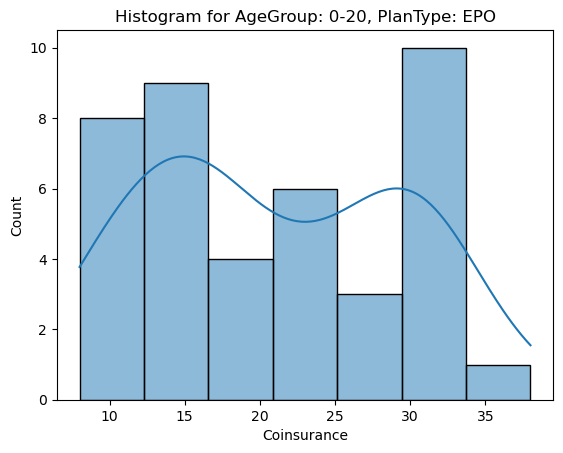

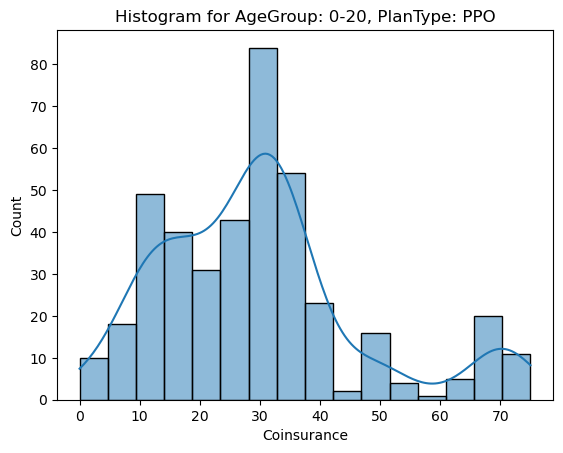

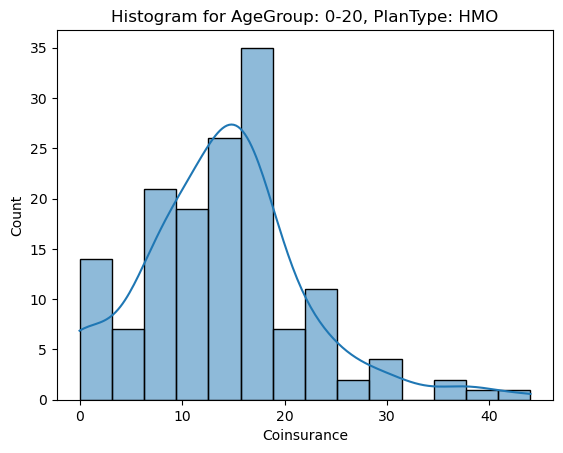

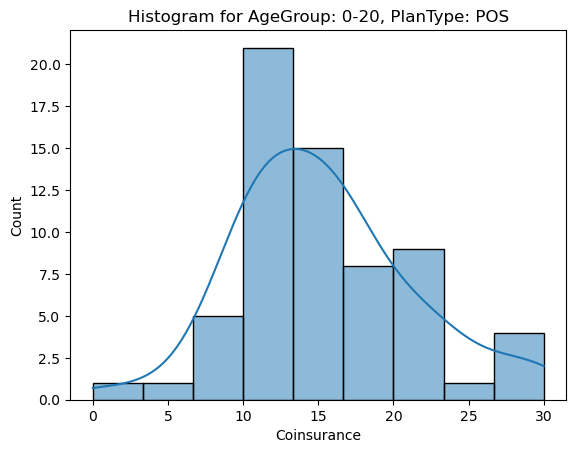

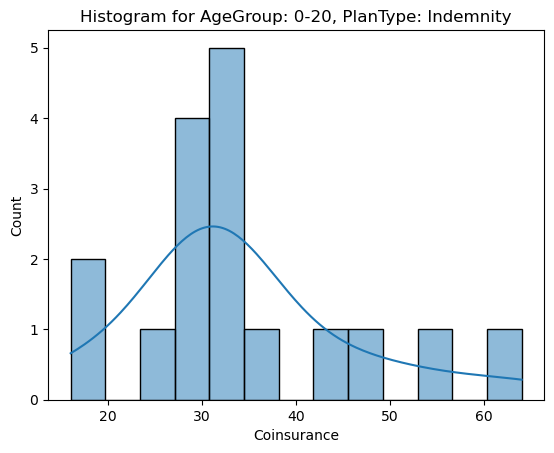

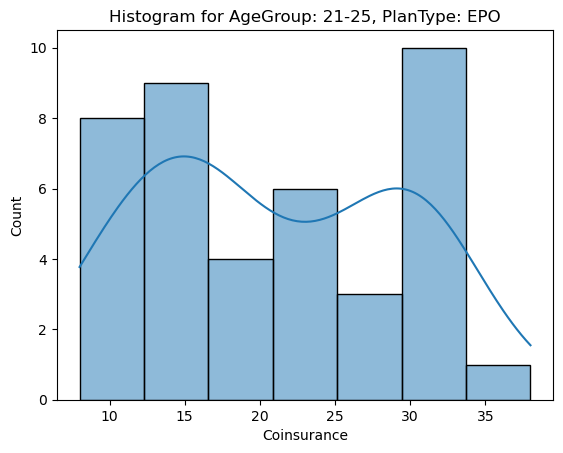

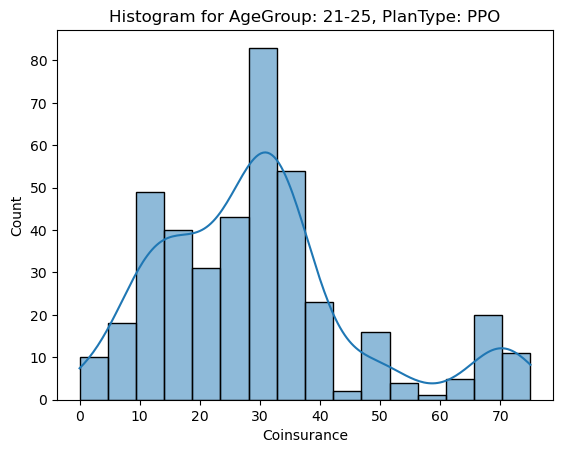

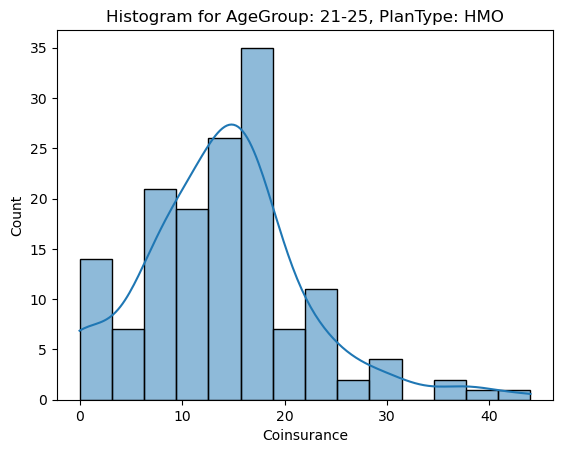

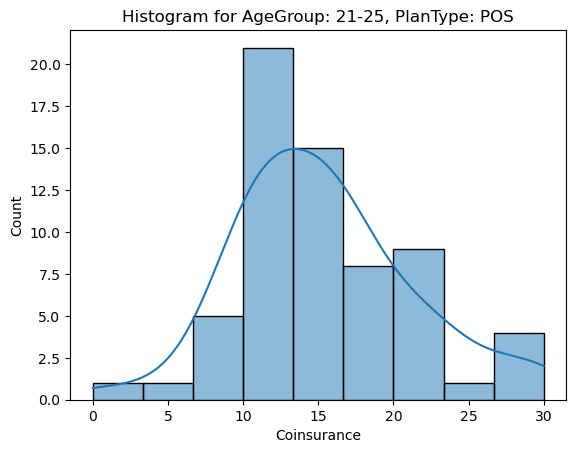

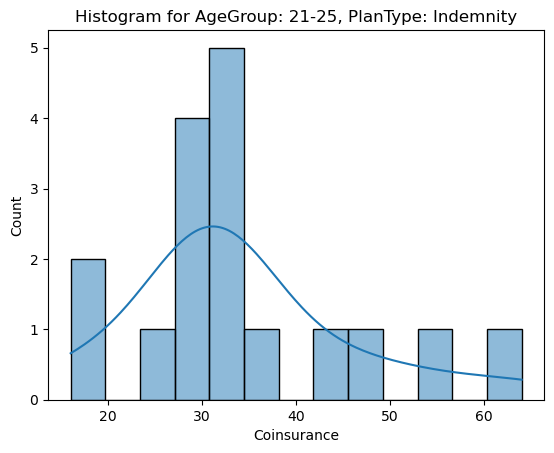

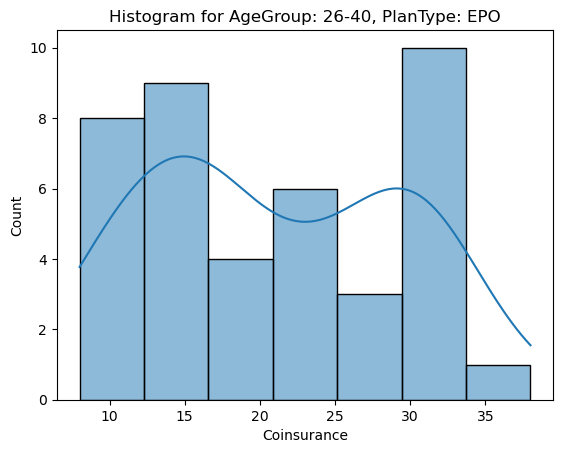

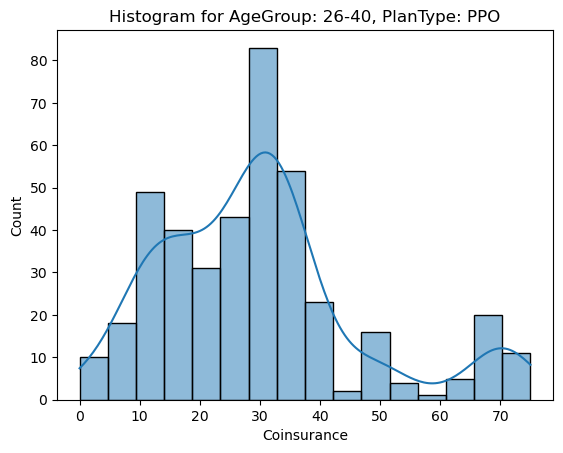

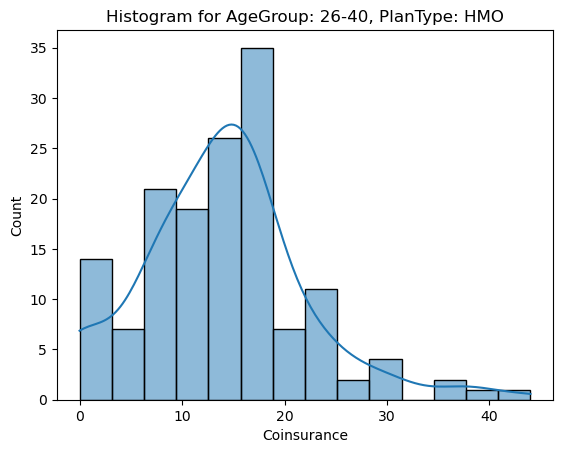

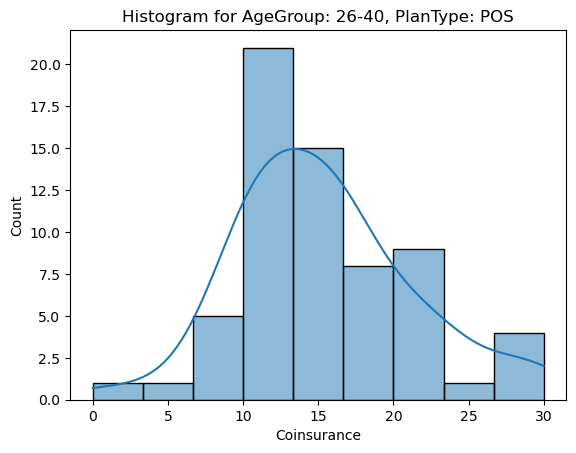

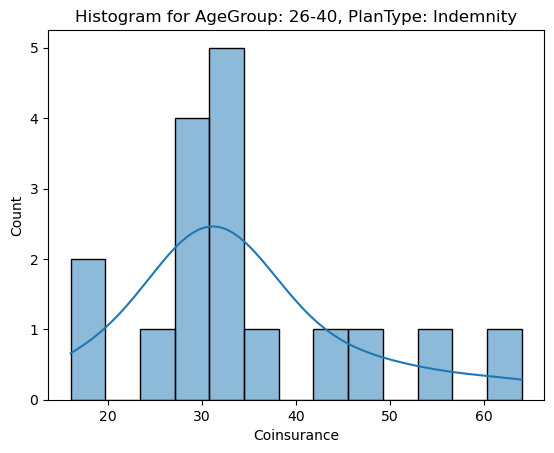

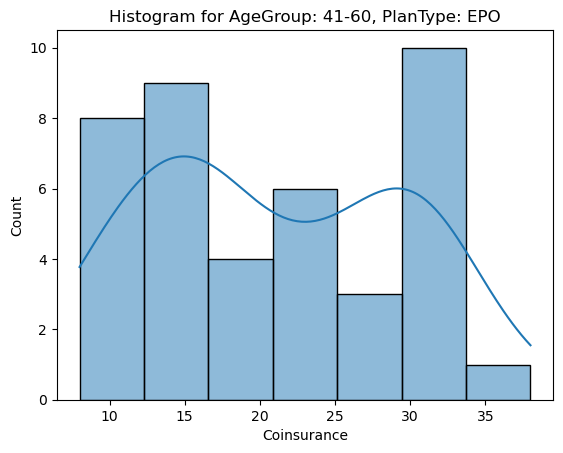

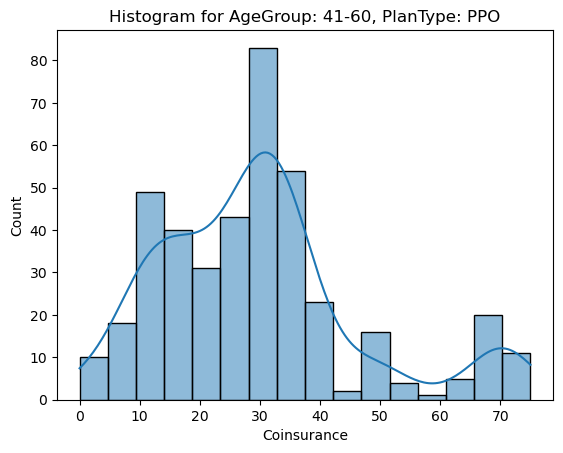

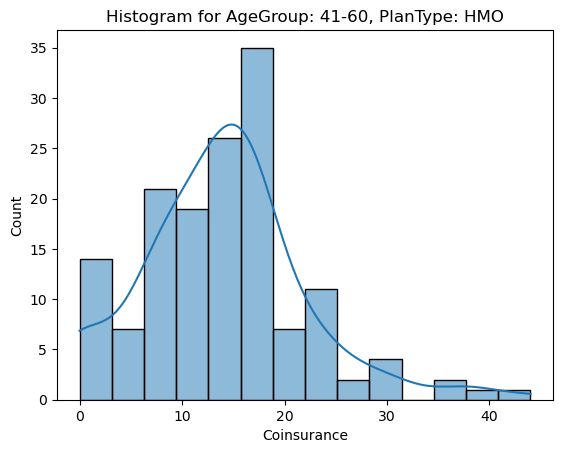

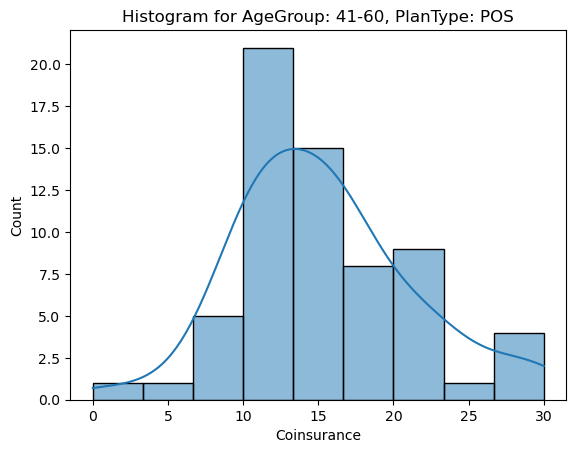

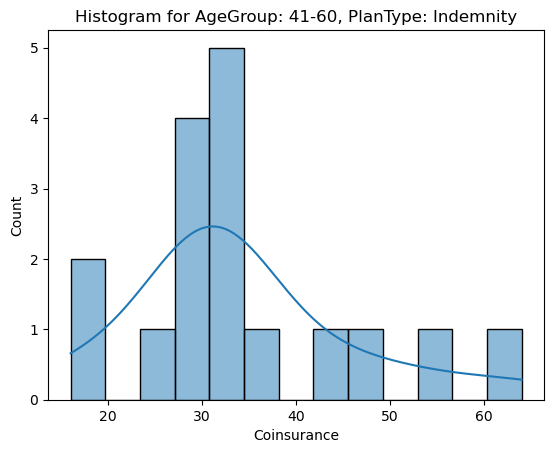

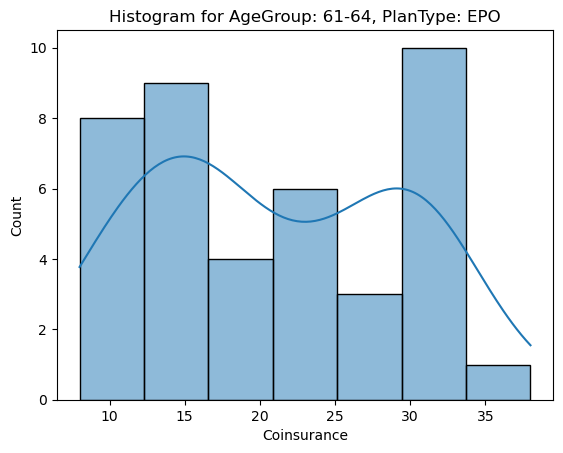

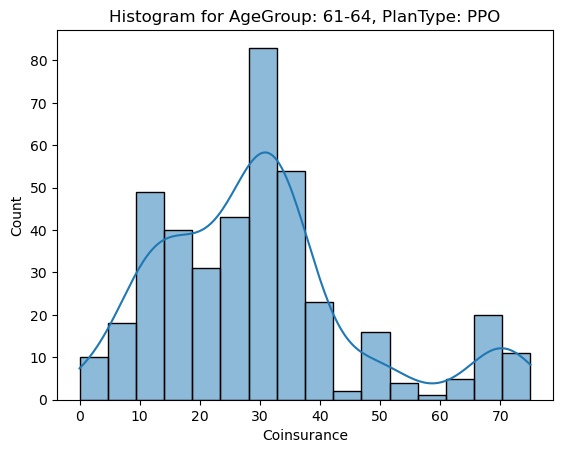

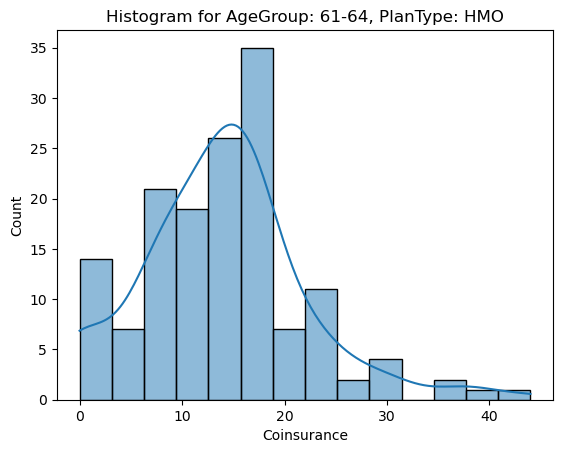

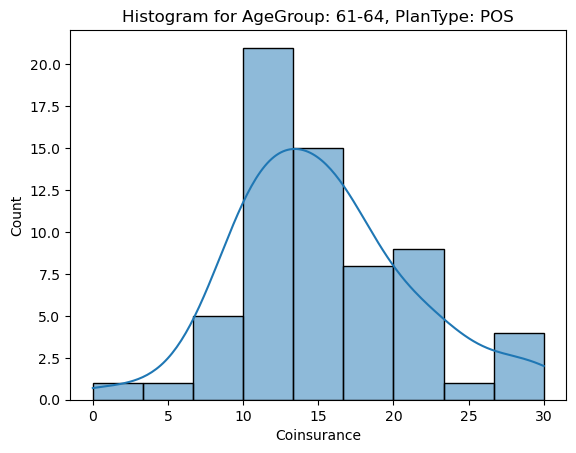

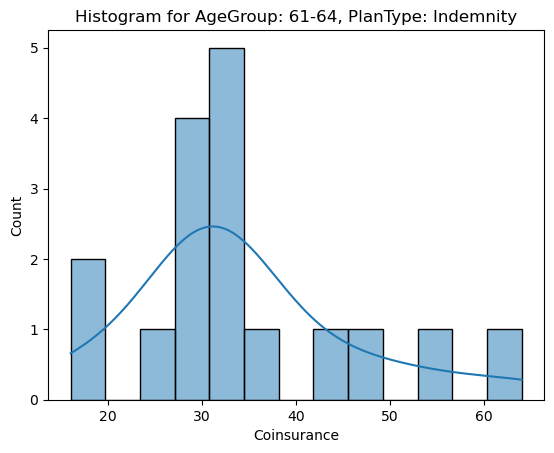

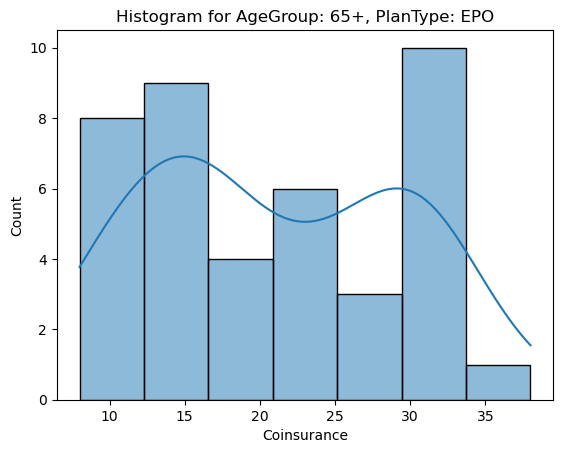

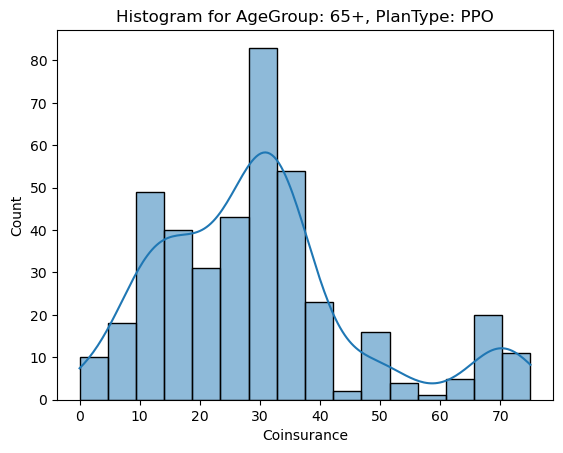

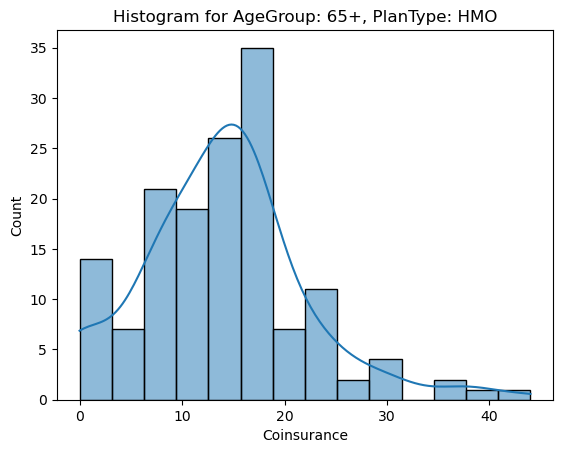

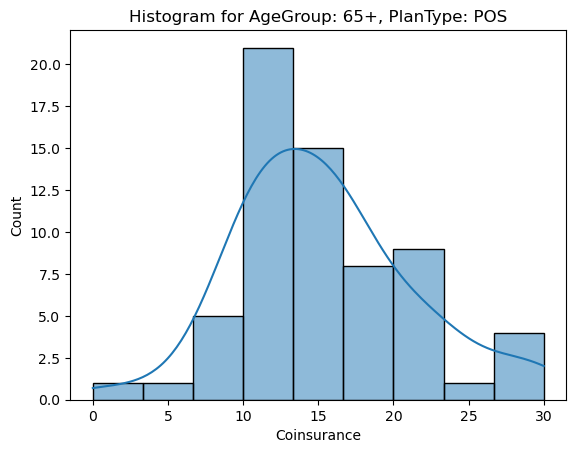

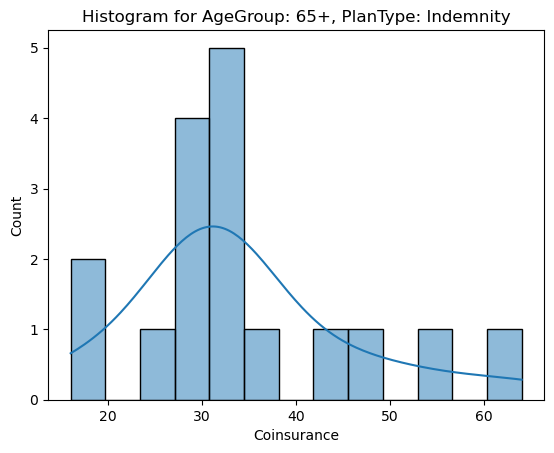

In [199]:
# 1. Check the distribution of data (Normality)
# We will check normality for each age group and plan type (PlanType)

# Select the column you want to test
age_groups = df_final_cleaned['AgeGroup'].unique()  # AgeGroup
plan_types = df_final_cleaned['PlanType'].unique()  # PlanType

# 1.1 Draw a histogram for checking dispersion
for age in age_groups:
    for plan in plan_types:
        subset = df_final_cleaned[(df_final_cleaned['AgeGroup'] == age) & (df_final_cleaned['PlanType'] == plan)]
        sns.histplot(subset['Coinsurance'], kde=True)
        plt.title(f'Histogram for AgeGroup: {age}, PlanType: {plan}')
        plt.show()

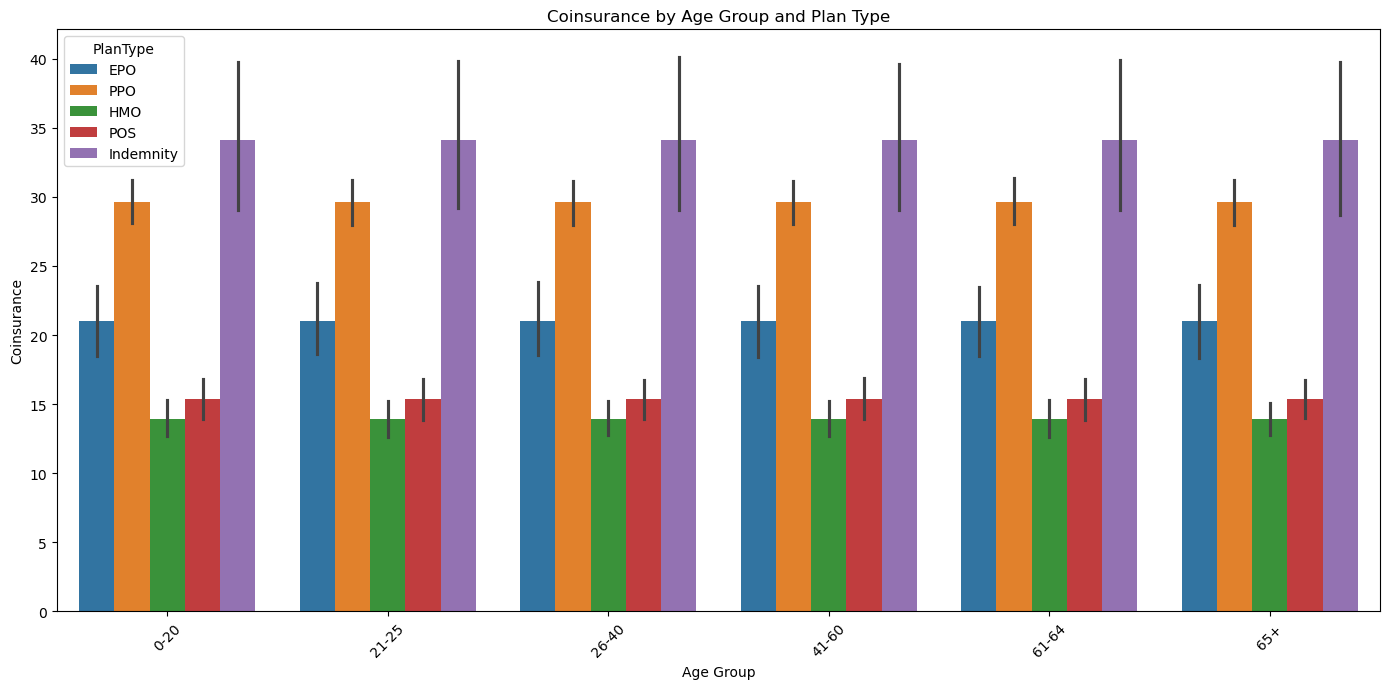

In [200]:
plt.figure(figsize=(14, 7))
sns.barplot(x='AgeGroup', y='Coinsurance', hue='PlanType', data=df_final_cleaned)
plt.xlabel('Age Group')
plt.ylabel('Coinsurance')
plt.title('Coinsurance by Age Group and Plan Type')
plt.legend(title='PlanType')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

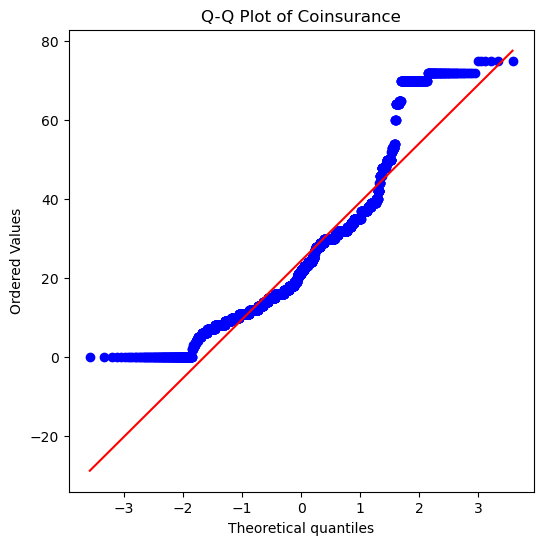

In [167]:

from scipy import stats
# 1.3 Check Q-Q plot
plt.figure(figsize=(6, 6))
stats.probplot(df_final_cleaned['Coinsurance'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Coinsurance')
plt.show()

In [169]:
# 2. Check equality of variances (Homogeneity of Variance).
# Use Levene's Test to check equality of variances.
# This example uses Copayment as the test variable
from scipy.stats import levene
copayment_values = [df_final_cleaned[df_final_cleaned['AgeGroup'] == age]['Coinsurance'].values for age in age_groups]

# Levene's Test for equal variances was performed.
stat, p_value = levene(*copayment_values)
print(f"Levene's Test for Homogeneity of Variance, p-value: {p_value}")
if p_value > 0.05:
    print("The variances are homogenous.")
else:
    print("The variances are not homogenous.")


Levene's Test for Homogeneity of Variance, p-value: 0.9999999999995672
The variances are homogenous.


In [171]:
# 3. Check the nature of the data (Numerical Data)
# Verify that 'Copayment' is a numeric variable.
if pd.api.types.is_numeric_dtype(df_final_cleaned['Coinsurance']):
    print("The 'Coinsurance' column contains numerical data.")
else:
    print("The 'Coinsurance' column does not contain numerical data.")

The 'Coinsurance' column contains numerical data.


In [173]:
pip install pingouin

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [174]:
import pingouin as pg

# Test Two-Way ANOVA by pingouin
anova_result = pg.anova(dv='Coinsurance', between=['AgeGroup', 'PlanType'], data=df_final_cleaned, detailed=True)

print(anova_result)
#p-unc: p-value
#F: F statistic
#np2: R-squared
# p-unc = p-value
# if p-value < alpha value (0.05) => Reject H0
# if p-value > alpha value (0.05) => Fail to reject H0


                Source             SS      DF            MS           F  \
0             AgeGroup       0.007056     5.0      0.001411    0.000007   
1             PlanType  209037.866000     4.0  52259.466500  267.520770   
2  AgeGroup * PlanType       0.004689    20.0      0.000234    0.000001   
3             Residual  794868.261468  4069.0    195.347324         NaN   

           p-unc           np2  
0   1.000000e+00  8.877427e-09  
1  2.157182e-204  2.082245e-01  
2   1.000000e+00  5.899082e-09  
3            NaN           NaN  


In [178]:
df_final_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4099 entries, 0 to 15743732
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   New_StandardComponentId  4099 non-null   object
 1   AgeGroup                 4099 non-null   object
 2   PlanType                 4099 non-null   object
 3   Coinsurance              4099 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 160.1+ KB


In [180]:
df_final_cleaned.shape

(4099, 4)

In [182]:
# Check for duplicate rows
duplicates = df_final_cleaned[df_final_cleaned.duplicated()]
print(f"Number of duplicate rows: {len(duplicates)}")

Number of duplicate rows: 0


In [184]:
# Remove duplicate rows
df_final_cleaned = df_final_cleaned.drop_duplicates()
print(f"Shape after removing duplicates: {df_final_cleaned.shape}")


Shape after removing duplicates: (4099, 4)


In [186]:
# Check for missing values
missing_values = df_final_cleaned.isna().sum()
print("Missing values per column:")
print(missing_values)


Missing values per column:
New_StandardComponentId    0
AgeGroup                   0
PlanType                   0
Coinsurance                0
dtype: int64


In [188]:
df_final_cleaned.to_csv("output.csv",index=1)

In [190]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Load your dataset
df = pd.read_csv("output.csv", low_memory=False)

# Step 1: Sample the data (e.g., 1% of the dataset)
df_sampled = df.sample(frac=0.01, random_state=42)

# Step 2: Preprocess the sampled data
# Encode categorical variables using Label Encoding
le = LabelEncoder()
df_sampled['AgeGroup'] = le.fit_transform(df_sampled['AgeGroup'])
df_sampled['PlanType'] = le.fit_transform(df_sampled['PlanType'])
df_sampled['New_StandardComponentId'] = le.fit_transform(df_sampled['New_StandardComponentId'])

# Define features (X) and target (y)
X = df_sampled[['AgeGroup', 'PlanType', 'New_StandardComponentId']]
y = df_sampled['Coinsurance']

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Display coefficients
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(coefficients)


Mean Squared Error: 36.41400673627115
R^2 Score: 0.60609848482399
                   Feature  Coefficient
0                 AgeGroup     1.752949
1                 PlanType     4.749273
2  New_StandardComponentId     0.267516


In [194]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from scipy.sparse import issparse

# Assuming your DataFrame is loaded as 'df'
# Replace this with your actual DataFrame
# df = pd.read_csv("your_file.csv")

# Separating features and target
target = 'Coinsurance'
features = ['New_StandardComponentId', 'AgeGroup', 'PlanType']
X = df[features]
y = df[target]

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing: OneHotEncoding for categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), features)
    ],
    remainder='passthrough'  # Keeps the target column unchanged
)

# Transform the data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Standardize the data for Neural Networks
scaler = StandardScaler(with_mean=not issparse(X_train))
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

# Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
gb_preds = gb_model.predict(X_test)

# Neural Network Regressor
nn_model = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
nn_model.fit(X_train_scaled, y_train)
nn_preds = nn_model.predict(X_test_scaled)

# Evaluating the models
def evaluate_model(y_test, preds, model_name):
    mse = mean_squared_error(y_test, preds)
    r2 = r2_score(y_test, preds)
    print(f"{model_name} Results:")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"R^2 Score: {r2:.4f}\n")

# Random Forest Evaluation
evaluate_model(y_test, rf_preds, "Random Forest")

# Gradient Boosting Evaluation
evaluate_model(y_test, gb_preds, "Gradient Boosting")

# Neural Network Evaluation
evaluate_model(y_test, nn_preds, "Neural Network")


Random Forest Results:
Mean Squared Error: 0.4221
R^2 Score: 0.9983

Gradient Boosting Results:
Mean Squared Error: 125.5250
R^2 Score: 0.4996

Neural Network Results:
Mean Squared Error: 0.0812
R^2 Score: 0.9997



Analysis of Results:
1. Random Forest:
MSE: 0.4221
R² Score: 0.9983
The Random Forest model performs exceptionally well with a very low error and a near-perfect R² score. This suggests it is well-suited for the data.
2. Gradient Boosting:
MSE: 125.5250
R² Score: 0.4996
Gradient Boosting has struggled to capture the patterns in the data, evident from its high error and low R² score. You might want to experiment with hyperparameter tuning, especially learning_rate, n_estimators, and max_depth.
3. Neural Network:
MSE: 0.0812
R² Score: 0.9997
The Neural Network significantly outperforms the other models with the lowest error and the best R² score. This suggests it has effectively captured the complexity of the data.